# Projekt: Co słychać w zatoce piratów?
#### - Cel Statystyczny: Analiza statystyczna danych.
#### - Cel Python: Aplikacja automatycznie tworząca różne wykresy i zestawienia danych

### Zmienne:
- Title - tytuł wydania
- Total snatched - liczba pobrań
- Artist - twórca
- Group year - rok wydania
- Release type - typ wydania:
- Artist - twórca
- Tag

## Release type analysis

### Grupa: WDevs

#### Agnieszka Tetla

### Temat: Analiza pobrań w zależności od typu wydania

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wd
import plotly.express as px

In [5]:
df = pd.read_csv('torrenty_202106201241.csv')

### Usunięcie duplikatów pod kątem analizy typu wydania vs. liczby pobrań

In [6]:
df.drop_duplicates(subset ="Title",
                     keep = False, inplace = True)
df.head()

,id,Title,totalSnatched,artist,groupYear,releaseType,tag
10,10,christmas rappin&#39;,109,kurtis blow,1979,single,christmas
13,13,sugarhill gang,1424,sugarhill gang,1980,album,new.york
71,71,8th wonder,445,sugarhill gang,1981,album,new.york
74,74,live convention &#39;81,92,various artists,1981,live album,1980s
81,81,the adventures of grandmaster flash on the whe...,16,grandmaster flash & grandmaster flash & the fu...,1981,single,turntablism


### Typ wydania vs. liczba pobrań

In [8]:
p_table = pd.pivot_table(df, values='totalSnatched', index=['releaseType'], aggfunc=np.sum).sort_values("totalSnatched", ascending=False).reset_index()
p_table

,releaseType,totalSnatched
0,album,2193609
1,single,262914
2,mixtape,183812
3,ep,181876
4,compilation,66555
5,anthology,55858
6,soundtrack,47080
7,remix,45475
8,bootleg,14983
9,dj mix,14319


Text(0, 0.5, 'Liczba pobrań')

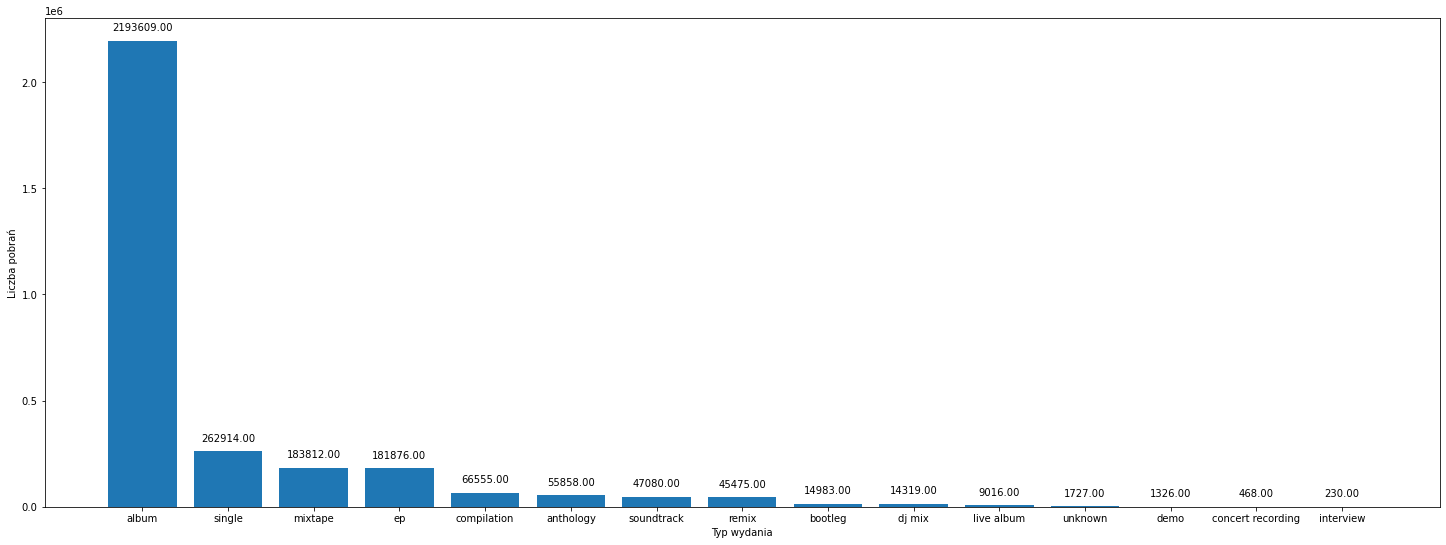

In [12]:
x = p_table['releaseType'].to_list()
y = p_table['totalSnatched'].to_list()
plt.figure(figsize=(25, 9))
plt.bar(x,y)


for x,y in zip(x,y):
    label = "{:.2f}".format(y)
    plt.annotate(label,(x,y), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.xlabel("Typ wydania")
plt.ylabel("Liczba pobrań")


## Rok wydania vs. typ wydania - łącznie

#### Poniższy wykres pokazuje liczbę pobrań w podziale na typ oraz rok wydania

Text(159.0, 0.5, 'Rok wydania')

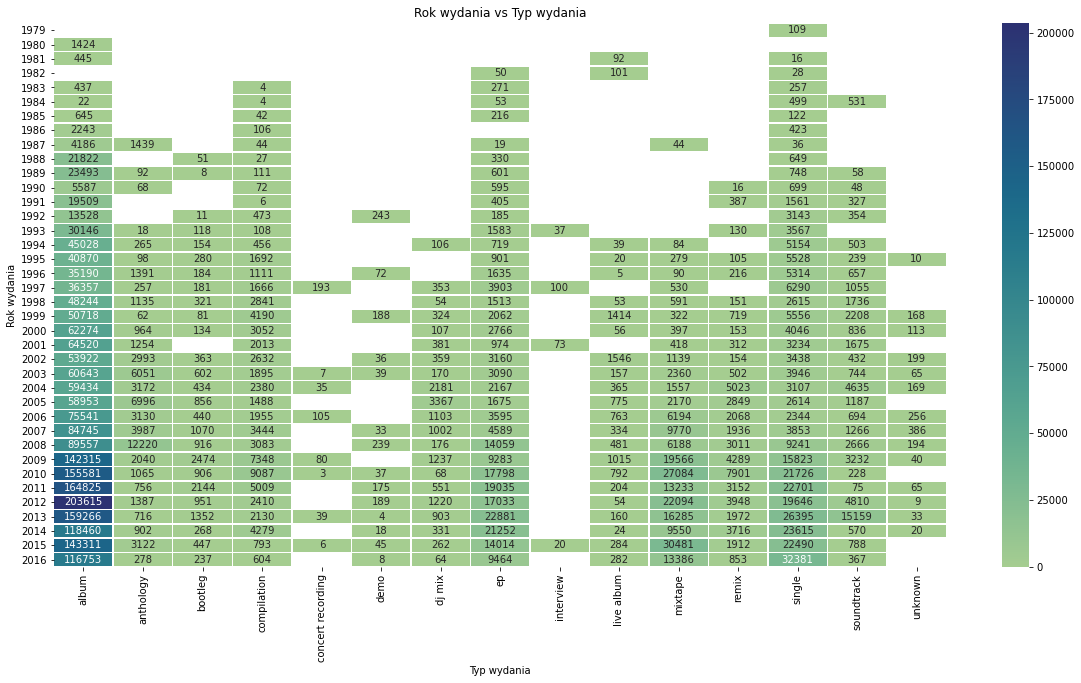

In [17]:
table_count = pd.pivot_table(data=df,
                             index=['groupYear'],
                             columns= ['releaseType'],
                             values=['totalSnatched'],
                             aggfunc='sum')

fig,ax = plt.subplots(figsize=(20,10))
plt.title('Rok wydania vs Typ wydania')
sns.heatmap(table_count['totalSnatched'],vmin=0,linewidth=.5,annot=True,fmt='2.0f',cmap="crest")
plt.xlabel("Typ wydania") 
plt.ylabel("Rok wydania") 

## Rok wydania vs. typ wydania - w podziale na typ wydania

#### Poniższy wykres pokazuje liczbę pobrań ze względu na rok wydania, w podziale na poszczególne typy wydania

In [18]:
dd = wd.Dropdown(
    options=['All'] + list(p_table['releaseType'].unique()),
    value="All",
    description='Release type:')

myout = wd.Output()


def draw_plot(change):
    with myout:
        if change.new == 'All':
            table_count2 = pd.pivot_table(data=df,
                             index=['groupYear'],
                             columns=['releaseType'],
                             values=['totalSnatched'],
                             aggfunc='sum')
        else:
            table_count2 = pd.pivot_table(data=df[df.releaseType == change.new],
                             index=['groupYear'],
                             columns=['releaseType'],
                             values=['totalSnatched'],
                             aggfunc='sum')
        myout.clear_output()
        fig,ax = plt.subplots(figsize=(25,10))
        plt.title('GroupYear vs ReleaseType')
        sns.heatmap(table_count2['totalSnatched'],vmin=0,linewidth=.5,annot=True,fmt='2.0f',cmap="crest")
        plt.xlabel("Typ wydania") 
        plt.ylabel("Rok wydania")
        plt.show()
    
    
dd.observe(draw_plot, names='value')
display(dd)
display(myout)

Dropdown(description='Release type:', options=('All', 'album', 'single', 'mixtape', 'ep', 'compilation', 'anth…

Output()

## Liczba twórcow vs. typ wydania

#### Poniższy wykres pokazuje liczbę twórców przypadających na dany typ wydania

In [19]:
artist_count = df.groupby(['releaseType']).artist.count().reset_index()
artist_count


,releaseType,artist
0,album,7956
1,anthology,277
2,bootleg,169
3,compilation,837
4,concert recording,8
5,demo,23
6,dj mix,145
7,ep,1941
8,interview,4
9,live album,73


In [28]:
px.bar(data_frame=artist_count, x = 'releaseType', y = 'artist',
                  labels={
                     "releaseType": "Typ wydania",
                     "artist": "Liczba twórców"})


### Wykres bąbelkowy - zestawienie ilości pobrań / ilości twórców / typu wydania w poszczególnych latach

In [21]:
temp1 = df.groupby(['releaseType', 'groupYear'], as_index = False)['artist'].count()
temp2 = df.groupby(['groupYear','releaseType'], as_index = False)['totalSnatched'].sum()
combined2 = pd.merge(temp1, temp2, on=['releaseType', 'groupYear'])
combined2


,releaseType,groupYear,artist,totalSnatched
0,album,1980,1,1424
1,album,1981,1,445
2,album,1983,2,437
3,album,1984,1,22
4,album,1985,2,645
...,...,...,...,...
349,unknown,2009,2,40
350,unknown,2011,3,65
351,unknown,2012,1,9
352,unknown,2013,1,33


In [30]:
slider = wd.IntSlider(
    value=2016,
    min=1979,
    max=2016,
    step=1,
    description='Group_Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d')

myout2 = wd.Output()


def draw_plot2(year):
    with myout2:
        combined3 = combined2[(combined2.groupYear == year.new)]
        myout2.clear_output()
        fig = px.scatter(combined3, x='totalSnatched', y = 'artist', color = 'releaseType', 
           size = 'artist', log_x = True, hover_name = 'releaseType', size_max = 60,
                    labels={
                         "releaseType": "Typ wydania",
                         "artist": "Liczba twórców",
                        "totalSnatched": "Liczba pobrań"})
        fig.show()
        
slider.observe(draw_plot2, names='value')
display(slider)
display(myout2)




IntSlider(value=2016, continuous_update=False, description='Group_Year:', max=2016, min=1979)

Output()

### Zestawienie ilości tagow w podziale na typ wydania

In [31]:
df2 = pd.read_csv('torrenty_202106201241.csv')

In [32]:
temp3 = df2.groupby(['releaseType', 'groupYear'], as_index = False)['tag'].count()
temp3

,releaseType,groupYear,tag
0,album,1980,14
1,album,1981,5
2,album,1982,16
3,album,1983,44
4,album,1984,39
...,...,...,...
409,unknown,2010,8
410,unknown,2011,17
411,unknown,2012,10
412,unknown,2013,9


In [36]:
px.bar(data_frame=temp3, x = 'releaseType', y = 'tag',
                    labels={
                         "releaseType": "Typ wydania",
                         "tag": "Liczba tagów"})

Text(159.0, 0.5, 'Rok wydania')

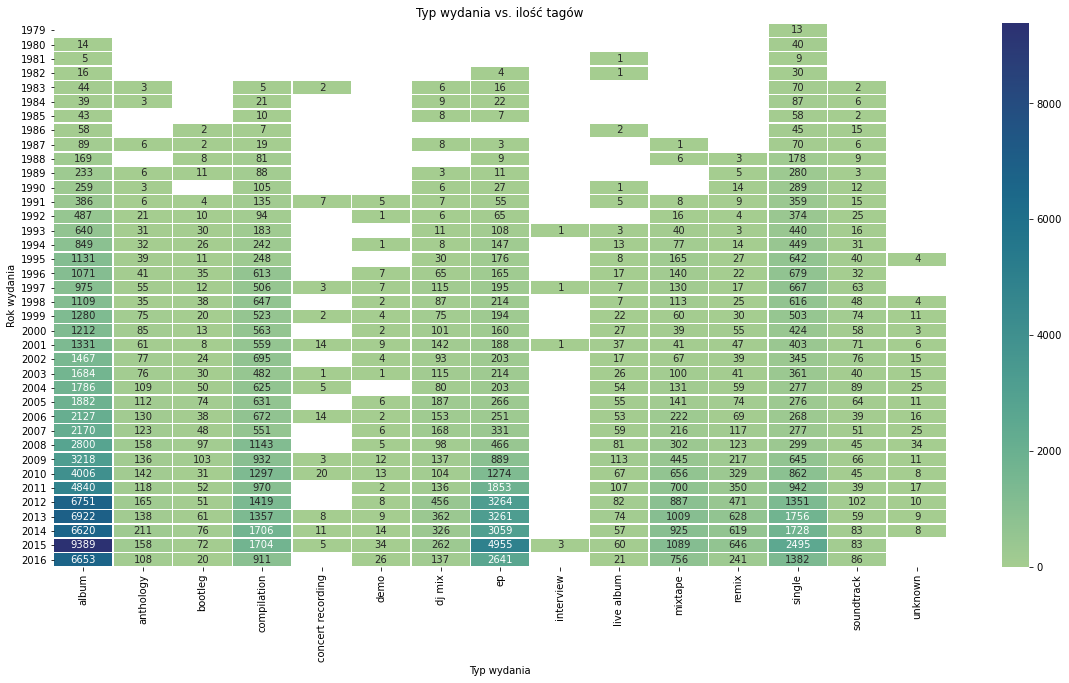

In [38]:
tags_count = pd.pivot_table(data=df2,
                             index=['groupYear'],
                             columns= ['releaseType'],
                             values=['tag'],
                             aggfunc='count')


fig,ax = plt.subplots(figsize=(20,10))
plt.title('Typ wydania vs. ilość tagów')
sns.heatmap(tags_count['tag'],vmin=0,linewidth=.5,annot=True,fmt='2.0f',cmap="crest")
plt.xlabel("Typ wydania") 
plt.ylabel("Rok wydania") 